# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [62]:
%pip install seaborn
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ataheri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [63]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [64]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [65]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [66]:
from IPython.display import display, Markdown

knicks_pts = nba_2010[nba_2010.fran_id == "Knicks"]
nets_pts = nba_2010[nba_2010.fran_id == "Nets"]

display(Markdown("**Knicks Pts 2010**"))
print(knicks_pts.head())
print("\n\n")
display(Markdown("**Nets Pts 2010**"))
print("Nets Pts")
print(nets_pts.head())


**Knicks Pts 2010**

            game_id  year_id fran_id  opp_fran game_location  is_playoffs  \
21719  200910280MIA     2010  Knicks      Heat             A            0   
21725  200910300CHA     2010  Knicks   Hornets             A            0   
21728  200910310NYK     2010  Knicks    Sixers             H            0   
21734  200911020NYK     2010  Knicks  Pelicans             H            0   
21739  200911040NYK     2010  Knicks    Pacers             H            0   

       pts  opp_pts game_result  forecast  point_diff  
21719   93      115           L  0.258755         -22  
21725  100      102           L  0.299804          -2  
21728  127      141           L  0.540618         -14  
21734  117      111           W  0.533563           6  
21739   89      101           L  0.566662         -12  





**Nets Pts 2010**

Nets Pts
            game_id  year_id fran_id      opp_fran game_location  is_playoffs  \
21720  200910280MIN     2010    Nets  Timberwolves             A            0   
21727  200910300NJN     2010    Nets         Magic             H            0   
21730  200910310WAS     2010    Nets       Wizards             A            0   
21733  200911020CHA     2010    Nets       Hornets             A            0   
21738  200911040NJN     2010    Nets       Nuggets             H            0   

       pts  opp_pts game_result  forecast  point_diff  
21720   93       95           L  0.475155          -2  
21727   85       95           L  0.378323         -10  
21730  104      123           L  0.440620         -19  
21733   68       79           L  0.313346         -11  
21738   94      122           L  0.325953         -28  


### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?


In [67]:
knicks_pts_mean = knicks_pts.pts.astype(float).mean()
nets_pts_mean = nets_pts.pts.astype(float).mean()

print(knicks_pts_mean)
print(nets_pts_mean)

diff_means_2010 = abs(knicks_pts_mean - nets_pts_mean)
print(diff_means_2010)

102.10975609756098
92.3780487804878
9.731707317073173


### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


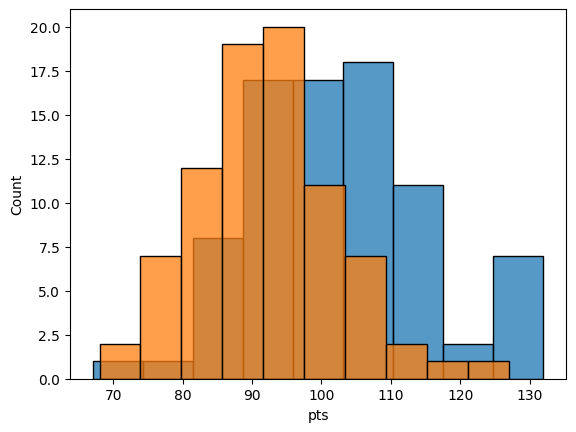

In [68]:
sns.histplot(knicks_pts.pts)
sns.histplot(nets_pts.pts)
plt.show()
plt.close()


### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


**Knicks Pts 2014**

            game_id  year_id fran_id      opp_fran game_location  is_playoffs  \
23469  201310300NYK     2014  Knicks         Bucks             H            0   
23473  201310310CHI     2014  Knicks         Bulls             A            0   
23480  201311030NYK     2014  Knicks  Timberwolves             H            0   
23486  201311050NYK     2014  Knicks       Hornets             H            0   
23490  201311080CHA     2014  Knicks       Hornets             A            0   

       pts  opp_pts game_result  forecast  point_diff  
23469   90       83           W  0.793150           7  
23473   81       82           L  0.450548          -1  
23480  100      109           L  0.743451          -9  
23486   97      102           L  0.859953          -5  
23490  101       91           W  0.609892          10  





**Nets Pts 2014**

Nets Pts
            game_id  year_id fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014    Nets  Cavaliers             A            0   
23475  201311010BRK     2014    Nets       Heat             H            0   
23482  201311030ORL     2014    Nets      Magic             A            0   
23484  201311050BRK     2014    Nets       Jazz             H            0   
23494  201311080WAS     2014    Nets    Wizards             A            0   

       pts  opp_pts game_result  forecast  point_diff  
23468   94       98           L  0.611981          -4  
23475  101      100           W  0.435184           1  
23482   86      107           L  0.664038         -21  
23484  104       88           W  0.669799          16  
23494  108      112           L  0.456299          -4  





**Means**

102.10975609756098
92.3780487804878
9.731707317073173





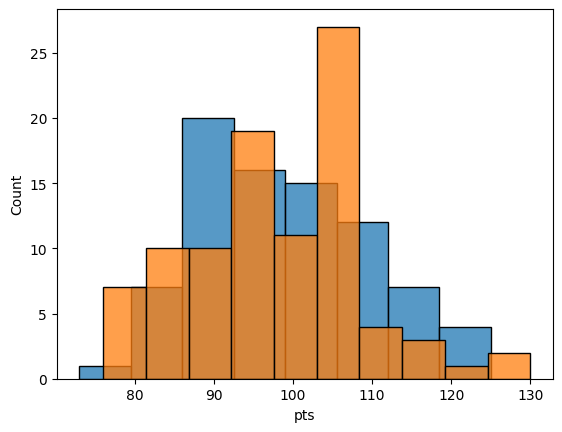

In [69]:
from IPython.display import display, Markdown

knicks_pts_2014 = nba_2014[nba_2014.fran_id == "Knicks"]
nets_pts_2014 = nba_2014[nba_2014.fran_id == "Nets"]

display(Markdown("**Knicks Pts 2014**"))
print(knicks_pts_2014.head())
print("\n\n")
display(Markdown("**Nets Pts 2014**"))
print("Nets Pts")
print(nets_pts_2014.head())


knicks_pts_2014_mean = knicks_pts.pts.astype(float).mean()
nets_pts_2014_mean = nets_pts.pts.astype(float).mean()

print("\n\n")
display(Markdown("**Means**"))
print(knicks_pts_2014_mean)
print(nets_pts_2014_mean)
diff_means_2014 = abs(knicks_pts_2014_mean - nets_pts_2014_mean)
print(diff_means_2014)

print("\n\n")
sns.histplot(knicks_pts_2014.pts)
sns.histplot(nets_pts_2014.pts)
plt.show()
plt.close()

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


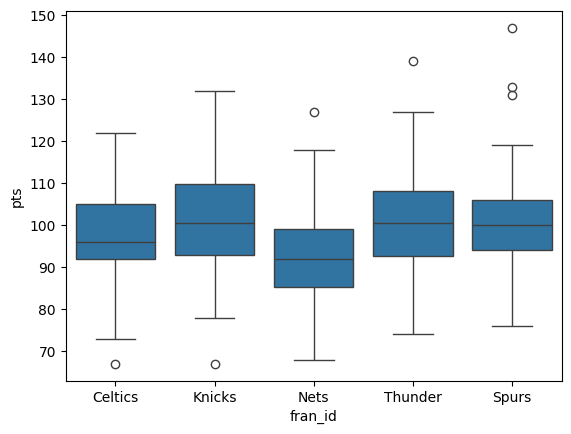

In [70]:
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [76]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)


chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(chi2)

game_location    A    H
game_result            
L              133  105
W               92  120
6.501704455367053


### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [78]:
location_result_proportions = location_result_freq / len(location_result_freq)
print(location_result_proportions)
location_result_proportions

game_location     A     H
game_result              
L              66.5  52.5
W              46.0  60.0


game_location,A,H
game_result,,
L,66.5,52.5
W,46.0,60.0


### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [81]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(chi2)
print(expected)

6.501704455367053
[[119. 119.]
 [106. 106.]]


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We're not there*

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [ ]:
print(nba_2010.columns)
point_diff_forecast_corr = np.cov(nba_2010.point_diff, nba_2010.forecast)
print(point_diff_forecast_corr)


Index(['game_id', 'year_id', 'fran_id', 'opp_fran', 'game_location',
       'is_playoffs', 'pts', 'opp_pts', 'game_result', 'forecast',
       'point_diff'],
      dtype='object')
[[186.56   1.37]
 [  1.37   0.05]]


array([[186.56,   1.37],
       [  1.37,   0.05]])

### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [95]:
print(nba_2010.columns)
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

Index(['game_id', 'year_id', 'fran_id', 'opp_fran', 'game_location',
       'is_playoffs', 'pts', 'opp_pts', 'game_result', 'forecast',
       'point_diff'],
      dtype='object')
PearsonRResult(statistic=np.float64(0.4402088708468082), pvalue=np.float64(9.410391573140234e-23))


### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

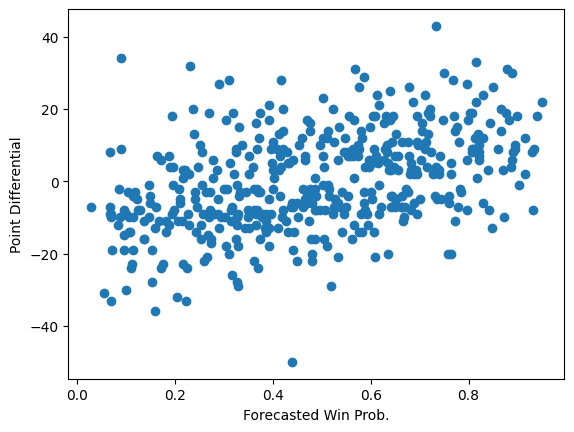

In [108]:
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()
plt.close()